# What impacts the duration of trips?

## Investigation Overview

> This investigation seeks to explore which feature impacts the duration of trips. The duration of trip is calculated by the start time and the end time of a users trip in minutes. We want to look for users who tend to ride bikes for a longer period of time.

## Dataset Overview

> The data set is retrieved from https://www.lyft.com/bikes/bay-wheels/system-data. 
Each month of the year 2018 is downloaded and concatenated into one large file. 
After concatenating the file, the data was cleaned. This new cleaned file is called 'for_exploring'


In [4]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [6]:
# load in the dataset into a pandas dataframe
bikedata = pd.read_csv('for_exploring.csv')

## (Visualization 1)

> I wanted to see if there was a pattern in the months and gender. Will females ride more in the summer and would males not really care about the weather? This graph shows the duration of the trips and the month for males and females. Females rode an average duration that was greater than that of males. However, the distribution of minutes for each month for both females and males were similar. Both average duration being highest at around june and july.


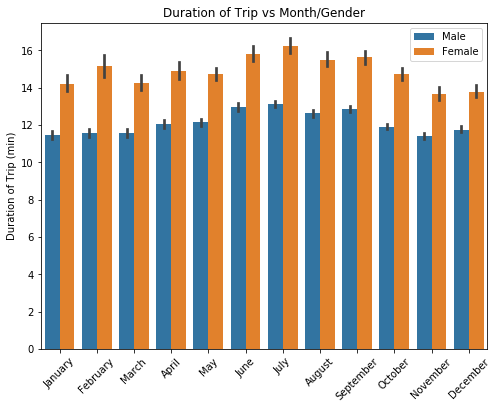

In [7]:
#multivariate bar plot to showdurationvs month/gender
plt.figure(figsize= (8,6))
sns.barplot(data=bikedata, x= 'start_month', y= 'duration_min', hue = 'member_gender', hue_order = ['Male','Female'])
plt.title('Duration of Trip vs Month/Gender')
plt.legend(title = None)
plt.xlabel('')
plt.ylabel('Duration of Trip (min)')
plt.xticks(rotation = 45);

## (Visualization 2)

> I wanted to see if older subscribers rode for a higher duration, as it was assumed that they had a lot of free time and thus take advantage of their subscription status. This graph shows two groups, subscribers and age. Age was divdided into two categories. Old is over 55 and young is under 55. The age 55 was chosen as it was the upper extreme of the age distribution. When comparing the average duration of the riders and their age category there was no real difference between the ages. However as expected, non subcribers had a higher average duration than the subscribers for both groups.

Text(0, 0.5, 'Duration of Ride (min)')

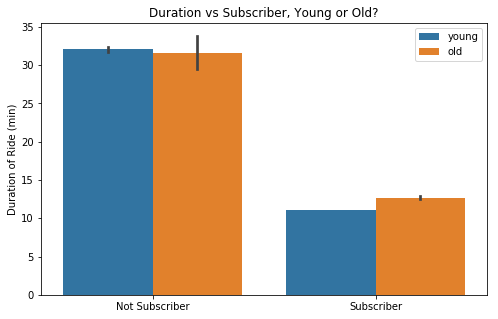

In [8]:
#bargraph of duration of ride on the age_category/ subscriber
plt.figure(figsize=(8,5))
sns.barplot(x='subscriber', y='duration_min',hue='age_cat',data=bikedata)
plt.title('Duration vs Subscriber, Young or Old?')
plt.xticks(ticks = [0,1],labels= ('Not Subscriber','Subscriber'))
plt.legend(title= None)
plt.xlabel('')
plt.ylabel('Duration of Ride (min)')

## (Visualization 3)

> I wanted to see if the distribution in the duration of trips will be impacted by the months and subscriber status. Will there be more subscribers riding in the colder months inorder to take advantage of their subscription? This graph shows duration on the y axis and the months on the x axis. The orange color are subscribers and blue are non-subscribers. The graph shows that more non-subscribers rode for a longer duration in the colder months (Jan, Feb, Dec). Overall, many non-subscribers rode for longer durations throughout the months. Subscribers rode mostly shorter durations under 200 minutes. Subscribers also rode for longer periods during the warmer months (May, June, July, August).

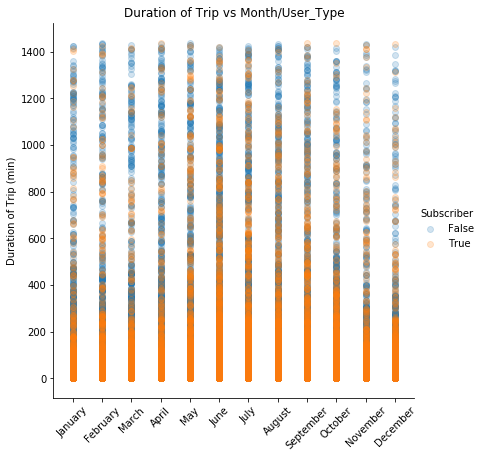

In [9]:
#duration of trip in minutes vs themonths/subscribers
g = sns.FacetGrid(data =bikedata, hue = 'subscriber',height = 6)
g.map(plt.scatter,'start_month','duration_min',alpha = .2)
g.add_legend(title=('Subscriber'))
plt.title('Duration of Trip vs Month/User_Type')
plt.ylabel('Duration of Trip (min)')
plt.xlabel('')
plt.xticks(rotation = 45);

# Conclusion:  
## Hotter months, Non-Subscribers, Females ride for longer